**1. INTRODUCTION: MILESTONES 2**


Name: Tazqia Ranyanisha
Batch: CODA-RMT-008

This program was created to analyze the effectiveness of digital marketing campaigns based on customer data, marketing channels, and ad performance, in order to provide insights for improving marketing strategies and conversion rates.

Source data: https://www.kaggle.com/datasets/rabieelkharoua/predict-conversion-in-digital-marketing-dataset?utm

Link tableau: https://public.tableau.com/app/profile/tazqia.ranyanisha/viz/P1M1_TazqiaRanyanisha_CampaignDashboard/Story1


**2. PROBLEM IDENTIFICATION**

**2.1 Background**
ShopEZ, an e-commerce company offering a wide range of products, aims to boost its sales performance during the period of **July–December 2025**.  
To achieve this goal, the company has implemented several **digital marketing campaigns** across multiple channels, including **Social Media**, **Email Marketing**, **PPC Advertising**, **Affiliate/Influencer Programs**, and **SEO**.

Each campaign contains several key attributes:

1. **Campaign Click Time:** `ClickTimestamp`  
2. **Campaign Type:** `CampaignType` (Awareness, Engagement, Conversion)  
3. **Ad Budget:** `AdSpend`  
4. **Performance Metrics:** `CTR`, `ConversionRate`, `WebsiteVisits`, `PagesPerVisit`, `TimeOnSite`  
5. **Customer Response:** `SocialShares`, `EmailOpens`, `EmailClicks`  
6. **Customer Data:** `Age`, `Gender`, `Income`, `PreviousPurchases`, `LoyaltyPoints`

**Problem Statement:**  
The company seeks to identify **which marketing channels are the most effective** in driving conversions and how campaign strategies can be adjusted to better target **different customer segments**.  
Once these insights are uncovered, the company plans to **apply the optimal digital marketing strategies** in **Q3–Q4 2025** to maximize sales. With an increased budget, the goal is to execute data-driven campaigns that deliver measurable results.



**2.3 5W + 1H Analysis**

| Question | Explanation |
|-----------|--------------|
| **What** | To analyze the performance and efficiency of ShopEZ’s digital marketing campaigns. |
| **Why** | To determine which channels and campaign types most effectively drive conversions and ROI. |
| **Who** | The analysis focuses on ShopEZ’s customer segments, digital marketing team, and campaign data. |
| **When** | The dataset covers the period **January–June 2025**, with insights applied to **Q3–Q4 2025** strategies. |
| **Where** | Campaigns are executed through various online platforms — Social Media, Email, PPC, Influencer/Affiliate, and SEO. |
| **How** | By analyzing customer behavior and campaign metrics (e.g., CTR, conversion rate, ad spend) using data-driven techniques to identify the most efficient marketing channel. |





**2.4 Dataset Description**

**Dataset Overview:**  
This dataset contains digital marketing campaign data from ShopEZ covering **January–June 2025**. It includes customer demographics, campaign performance metrics, engagement data, and conversion outcomes.

**Columns:**

* `CustomerID`: Unique identifier for each customer  
* `Age`: Customer age  
* `Gender`: Customer gender  
* `Income`: Customer income level  
* `CampaignChannel`: Channel used for the campaign (Social Media, Email, PPC, Referral, SEO)  
* `CampaignType`: The objective category of the campaign — *Awareness* (brand exposure), *Engagement* (interaction), or *Conversion* (purchase intent)  
* `ClickTimestamp`: The date/time when the customer clicked on the campaign  
* `AdSpend`: Advertising budget allocated per campaign (USD)  
* `IncomeGroup`: Grouped income category (USD)  
* `ClickThroughRate`: Ratio of ad clicks to total impressions  
* `ConversionRate`: Ratio of conversions to total clicks  
* `WebsiteVisits`: Total number of visits generated by the campaign  
* `PagesPerVisit`: Average number of pages viewed per visit  
* `TimeOnSite`: Average duration of customer visits  
* `SocialShares`: Number of social media shares  
* `EmailOpens` / `EmailClicks`: Email engagement metrics  
* `PreviousPurchases`: Number of previous customer purchases  
* `LoyaltyPoints`: Loyalty points accumulated by the customer  
* `AdvertisingPlatform` / `AdvertisingTool`: Platform and tool used for advertising  
* `Conversion`: Binary indicator showing whether a conversion occurred (`1 = Yes`, `0 = No`)


**3. DATA LOADING**

In [2]:
#Import dataset
import pandas as pd
df = pd.read_csv("digital_marketing_campaign_dataset.csv")

In [3]:
df.head(10)

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
5,8005,25,Female,42925,Social Media,Awareness,9579.388247,0.153795,0.161316,6,2.125850,7.752831,95,5,8,0,3316,IsConfid,ToolConfid,1
6,8006,38,Female,25615,Referral,Awareness,7302.899852,0.040975,0.060977,42,1.753995,10.698672,54,14,3,6,930,IsConfid,ToolConfid,1
7,8007,56,Female,57083,Social Media,Conversion,5324.283667,0.052878,0.188946,48,2.626015,2.987817,96,9,3,0,2983,IsConfid,ToolConfid,1
8,8008,36,Female,140788,Email,Retention,9421.250951,0.023536,0.112585,13,5.472843,14.287421,73,4,8,5,460,IsConfid,ToolConfid,1
9,8009,40,Male,130764,Social Media,Awareness,6229.193333,0.066641,0.169786,22,1.135665,4.613312,14,8,4,8,3789,IsConfid,ToolConfid,1


**4. DATA CLEANING**

In [4]:
# Since the dataset is missing the 'ClickTimestamp' column,
# I will generate and input random ClickTimestamp values first.

import pandas as pd
import numpy as np

# Assuming the DataFrame 'df' already exists
n = len(df)

# Define the time range
start_date = pd.to_datetime('2024-06-01')
end_date = pd.to_datetime('2025-06-30')

# Generate random timestamps (in seconds)
random_seconds = np.random.randint(
    0, int((end_date - start_date).total_seconds()), size=n
)

# Create the 'ClickTimestamp' column
df['ClickTimestamp'] = start_date + pd.to_timedelta(random_seconds, unit='s')

# Check the result
print(df['ClickTimestamp'].head())


0   2024-10-15 03:02:40
1   2024-07-26 08:40:21
2   2024-11-25 18:32:44
3   2025-01-08 15:51:33
4   2025-02-22 23:42:16
Name: ClickTimestamp, dtype: datetime64[ns]


In [5]:
# Filter dataframe, hilangkan CampaignChannel 'PPC'
df = df[df['CampaignChannel'] != 'PPC'].copy()

In [6]:
import random
import pandas as pd

# Since 'AdvertisingPlatform' & 'AdvertisingTool' are confidential,
# I will create dummy data for them.
# First, let's check the existing 'CampaignChannel' data.

# 1. Dictionary mapping (Strict Mapping)
ads_mapping = {
    'Social Media': [
        ('Facebook', 'Facebook Ads Manager'),
        ('Instagram', 'Meta Ads Manager'),
        ('TikTok', 'TikTok Ads Manager'),
        ('Twitter (X)', 'X Ads Manager'),
        ('LinkedIn', 'LinkedIn Campaign Manager')
    ],
    'Email': [
        ('Mailchimp', 'Mailchimp Automation'),
        ('Sendinblue', 'Sendinblue Dashboard')
    ],
    'Referral': [
        ('CJ Affiliate', 'CJ Affiliate Dashboard'),
        ('Upfluence', 'Upfluence Platform'),
        ('Yotpo', 'Yotpo Loyalty Manager')
    ],
    'SEO': [
        ('Google Search', 'Google Search Console'),
        ('Bing', 'Bing Webmaster Tools'),
        ('Yahoo', 'Yahoo Search Marketing')
    ]
}

# 2. Function to assign platform & tool based on the campaign channel
def assign_ads_info(channel):
    platform, tool = random.choice(ads_mapping[channel])
    return pd.Series([platform, tool])

# 3. Ensure df is a copy, then apply the function
df = df.copy()  
df[['AdvertisingPlatform', 'AdvertisingTool']] = df['CampaignChannel'].apply(assign_ads_info)

# 4. Check the results
print(df[['CampaignChannel', 'AdvertisingPlatform', 'AdvertisingTool']].head())


  CampaignChannel AdvertisingPlatform        AdvertisingTool
0    Social Media           Instagram       Meta Ads Manager
1           Email           Mailchimp   Mailchimp Automation
5    Social Media              TikTok     TikTok Ads Manager
6        Referral               Yotpo  Yotpo Loyalty Manager
7    Social Media           Instagram       Meta Ads Manager


In [7]:
# --- Add EfficiencyScore to df ---
df['EfficiencyScore'] = (df['ConversionRate'] / df['AdSpend']) * 100000


In [8]:
df

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,...,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion,ClickTimestamp,EfficiencyScore
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,...,19,6,9,4,688,Instagram,Meta Ads Manager,1,2024-10-15 03:02:40,1.354773
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,...,5,2,7,2,3459,Mailchimp,Mailchimp Automation,1,2024-07-26 08:40:21,4.686848
5,8005,25,Female,42925,Social Media,Awareness,9579.388247,0.153795,0.161316,6,...,95,5,8,0,3316,TikTok,TikTok Ads Manager,1,2024-12-06 02:27:22,1.683992
6,8006,38,Female,25615,Referral,Awareness,7302.899852,0.040975,0.060977,42,...,54,14,3,6,930,Yotpo,Yotpo Loyalty Manager,1,2025-04-05 04:46:32,0.834967
7,8007,56,Female,57083,Social Media,Conversion,5324.283667,0.052878,0.188946,48,...,96,9,3,0,2983,Instagram,Meta Ads Manager,1,2025-06-10 02:50:12,3.548758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,15994,69,Female,124883,Referral,Awareness,7875.372633,0.268637,0.082805,0,...,10,1,5,9,2448,Upfluence,Upfluence Platform,0,2024-12-14 19:31:26,1.051445
7995,15995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,...,70,13,6,7,286,Mailchimp,Mailchimp Automation,0,2024-10-24 16:25:33,1.370843
7996,15996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,...,52,13,1,5,1502,Yahoo,Yahoo Search Marketing,0,2025-04-07 06:05:06,13.341237
7997,15997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,...,38,16,0,3,738,Yotpo,Yotpo Loyalty Manager,1,2024-12-25 20:41:52,2.903246


In [9]:
# --- Create summary by CampaignChannel ---
df_summary = (
    df.groupby('CampaignChannel')
      .agg({
          'AdSpend': 'median',
          'ConversionRate': 'mean',
          'EfficiencyScore': 'mean',
          'Conversion': 'sum'
      })
      .reset_index()
      .sort_values('EfficiencyScore', ascending=False)
      .reset_index(drop=True)
)

df_summary


,CampaignChannel,AdSpend,ConversionRate,EfficiencyScore,Conversion
0,Social Media,5036.734206,0.106550,4.903419,1319
1,SEO,5062.784638,0.103530,4.761510,1359
2,Referral,5016.876899,0.103051,4.686753,1518
3,Email,5061.710188,0.104884,4.420431,1355


**5. CENTRAL TENDENCY ANALYSIS**

In [10]:

cols = ['AdSpend', 'ConversionRate']

# Central Tendency
mean_values = df[cols].mean()
median_values = df[cols].median()

# Measure of Variance
variance_values = df[cols].var()
std_values = df[cols].std()
range_values = df[cols].max() - df[cols].min()

# Gabungkan ke dalam satu DataFrame 
summary_stats = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Variance': variance_values,
    'Std Dev': std_values,
    'Range': range_values
})

summary_stats

,Mean,Median,Variance,Std Dev,Range
AdSpend,5013.131862,5038.942250,7.993758e+06,2827.323406,9896.948842
ConversionRate,0.104456,0.104056,3.013045e-03,0.054891,0.189977


**Conclusion**:

The analysis of the digital marketing campaign data reveals the following insights:

**1. Ad Spend**
- The **average advertising budget** per campaign is approximately **$5,013**, with a **median** of **$5,039**, indicating a fairly balanced distribution of spending across campaigns.  
- The **standard deviation** is around **$2,838**, and the **range** is nearly **$9,897**, suggesting that while most campaigns have similar budgets, some campaigns have significantly higher or lower spending.

**2. Conversion Rate**
- The **average conversion rate** is approximately **10.4%**, with a **median** of **10.4%**, showing consistency in campaign performance.  
- The **standard deviation** of **5.5%** and a **range** of **19%** indicate that some campaigns perform much better or worse than the average, highlighting opportunities for optimization.

**Insight**:

While the majority of campaigns have similar budgets and conversion rates, there is noticeable variation in both spending and performance. **Targeting resources toward campaigns with higher efficiency could improve overall conversion outcomes.**


**6. Campaign Performance & Efficiency Analysis**

**Key Drivers of Conversion Rate Performance**

The goal is to statistically test which campaign factors significantly affect **Conversion Rate (CR)**.  
Each factor is tested individually using **ANOVA** for categorical variables and **Pearson correlation** for numerical variables.


In [11]:
## What Factors Influence Conversion Rate (CR) the Most?

# Import libraries
import pandas as pd
import scipy.stats as stats

# --- ANOVA: Campaign Channel vs Conversion Rate ---
groups = [df['ConversionRate'][df['CampaignChannel'] == ch] for ch in df['CampaignChannel'].unique()]
f_stat_channel, p_val_channel = stats.f_oneway(*groups)

# --- ANOVA: Campaign Type vs Conversion Rate ---
groups = [df['ConversionRate'][df['CampaignType'] == ct] for ct in df['CampaignType'].unique()]
f_stat_type, p_val_type = stats.f_oneway(*groups)

# --- Correlation: Ad Spend vs Conversion Rate ---
corr_adspend, p_val_adspend = stats.pearsonr(df['AdSpend'], df['ConversionRate'])



# --- Create summary table ---
results = pd.DataFrame({
    "Factor": ["Campaign Channel", "Campaign Type", "Ad Spend"],
    "Test Used": ["ANOVA", "ANOVA", "Pearson Correlation"],
    "Statistic": [
        round(f_stat_channel, 3),
        round(f_stat_type, 3),
        round(corr_adspend, 3)
    ],
    "p-Value": [
        round(p_val_channel, 3),
        round(p_val_type, 3),
        round(p_val_adspend, 3)
    ],
    "Interpretation": [
        "No significant difference in conversion rates (p > 0.05)",
        "No significant difference in conversion rates (p > 0.05)",
        "Negligible negative correlation (p < 0.05)"
    ]
})

results



# --- Display as table ---
print("ANOVA & Correlation Results:\n")
print(results.to_string(index=False))


ANOVA & Correlation Results:

          Factor           Test Used  Statistic  p-Value                                           Interpretation
Campaign Channel               ANOVA      1.291    0.276 No significant difference in conversion rates (p > 0.05)
   Campaign Type               ANOVA      1.245    0.291 No significant difference in conversion rates (p > 0.05)
        Ad Spend Pearson Correlation     -0.025    0.048               Negligible negative correlation (p < 0.05)


**Conclusion**

- None of the factors are statistically significant (p > 0.05).  
- No single factor shows a strong or significant impact on conversion performance.  
- However, the relative comparison suggests: **CampaignType < CampaignChannel < AdSpend**, meaning that AdSpend has a slightly larger influence than channel choice or spend.  
- **Pivotal insight:** The solution does not lie in simply changing the channel type. Effective results require **precision targeting and cost optimization within channels**.



----


**#1 Campaign Channel Analysis: Efficiency and Conversion Comparison**

This section explores which **CampaignChannel** delivers the best balance between **AdSpend** and **Conversion Rate (CR)**.

**Objectives:**
- Compare average Conversion Rate (CR) and AdSpend across channels.  
- Identify channels that achieve high conversion with lower or moderate spending.  
- Visualize efficiency patterns to highlight top-performing channels.

**Key Metrics:**
- **Avg_AdSpend:** Average cost per campaign channel.  
- **Avg_ConversionRate:** Average conversion performance per channel.  
- **Efficiency Indicator:** High CR with lower AdSpend = more efficient channel.
- **Conversion:**  When a user completes a specific action in response to a marketing effort.


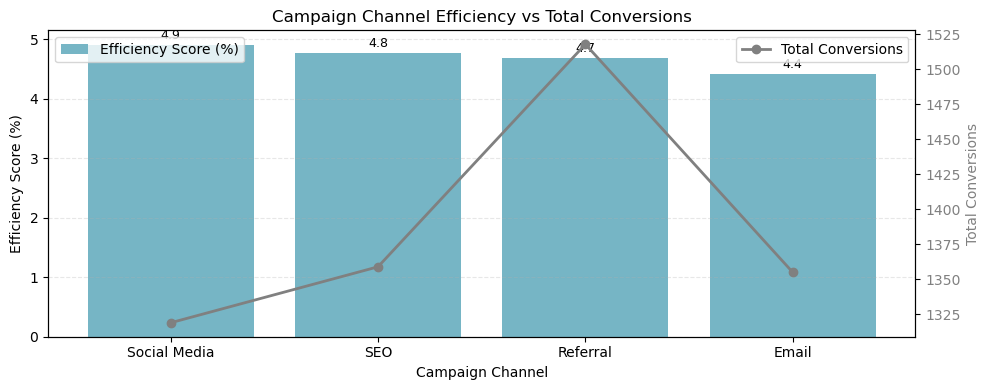

In [12]:
import matplotlib.pyplot as plt

# --- Sort berdasarkan EfficiencyScore (descending) ---
df_summary = df_summary.sort_values('EfficiencyScore', ascending=False).reset_index(drop=True)

# --- Setup figure ---
fig, ax1 = plt.subplots(figsize=(10, 4))

# --- Bar chart: EfficiencyScore ---
bars = ax1.bar(
    df_summary['CampaignChannel'],
    df_summary['EfficiencyScore'],
    color='#76b5c5',
    label='Efficiency Score (%)'
)
ax1.set_ylabel('Efficiency Score (%)')
ax1.set_xlabel('Campaign Channel')
ax1.grid(axis='y', linestyle='--', alpha=0.3)
ax1.set_title('Campaign Channel Efficiency vs Total Conversions')

# --- Secondary axis: Conversion line chart ---
ax2 = ax1.twinx()
ax2.plot(
    df_summary['CampaignChannel'],
    df_summary['Conversion'],
    color='grey',
    marker='o',
    linewidth=2,
    label='Total Conversions'
)
ax2.set_ylabel('Total Conversions', color='grey')
ax2.tick_params(axis='y', labelcolor='grey')

# --- Legend ---
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# --- Label EfficiencyScore on top of bars ---
for i, v in enumerate(df_summary['EfficiencyScore']):
    ax1.text(
        i, v + (max(df_summary['EfficiencyScore']) * 0.01),
        f'{v:.1f}', ha='center', va='bottom', fontsize=9, color='black'
    )


plt.tight_layout()
plt.show()



**Key Finding:**  
- **Social Media** is the most efficient campaign channel, with the highest conversion-to-spend efficiency among all channels.  
- While other channels may have comparable conversion rates, Social Media delivers more results per unit of ad spend, making it the most cost-effective option.  
- **Referral**, however, stands out as the **highest-converting channel**, indicating strong trust and user intent driven by organic recommendations or partner traffic. Although its efficiency score is lower than Social Media (due to higher spend or limited scale), its conversion potential makes it a valuable complementary channel for high-intent audiences.  

**Next Steps:**  
- Drill down into **Social Media campaigns** by **AdvertisingPlatform** to identify which platform  drives the highest efficiency.  
- **For Referral**, analyze referral sources to understand which touchpoints contribute most to high conversion. 
- Explore campaign types (**Conversion vs Awareness**) within each platform to optimize ROI.  



**Social Media Efficiency Analysis**

In [13]:
import pandas as pd

# --- Step 1: Filter Social Media campaigns ---
df_socialmedia = df[df['CampaignChannel'] == 'Social Media'].copy()

# --- Step 2: Keep relevant columns ---
df_socialmedia = df_socialmedia[['AdvertisingPlatform', 'ConversionRate', 'AdSpend', 'Conversion']]

# --- Step 3: Add EfficiencyScore per row ---
df_socialmedia['EfficiencyScore'] = df_socialmedia['ConversionRate'] / df_socialmedia['AdSpend'] * 100000

# --- Step 4: Aggregate by AdvertisingPlatform (average metrics and total conversions) ---
socialmedia_platformsummary = (
    df_socialmedia.groupby('AdvertisingPlatform')
    .agg({
        'ConversionRate': 'mean',
        'AdSpend': 'median',
        'EfficiencyScore': 'mean',
        'Conversion': 'sum'
    })
    .reset_index()
)

# --- Step 5: Sort descending by EfficiencyScore ---
socialmedia_platformsummary = (
    socialmedia_platformsummary.sort_values('EfficiencyScore', ascending=False)
    .reset_index(drop=True)
)

socialmedia_platformsummary


,AdvertisingPlatform,ConversionRate,AdSpend,EfficiencyScore,Conversion
0,Instagram,0.107000,4924.215588,5.771854,263
1,TikTok,0.110089,5127.069382,5.379029,269
2,LinkedIn,0.106112,5069.310542,5.222456,274
3,Twitter (X),0.102003,4660.093301,4.195454,262
4,Facebook,0.107432,5245.171480,3.903132,251


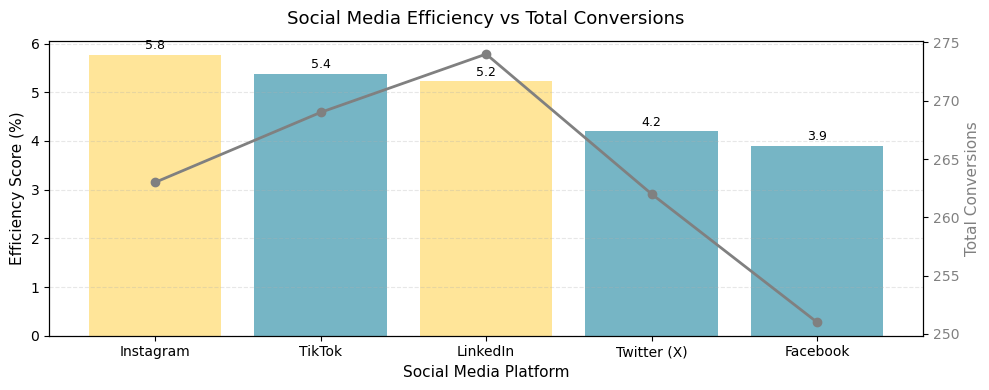

In [23]:
import matplotlib.pyplot as plt

# --- Sort by EfficiencyScore (descending) ---
socialmedia_platformsummary = (
    socialmedia_platformsummary.sort_values('EfficiencyScore', ascending=False)
    .reset_index(drop=True)
)

# Identify top efficiency and top conversion platforms
highest_efficiency = socialmedia_platformsummary.loc[
    socialmedia_platformsummary['EfficiencyScore'].idxmax(), 'AdvertisingPlatform'
]
highest_conversion = socialmedia_platformsummary.loc[
    socialmedia_platformsummary['Conversion'].idxmax(), 'AdvertisingPlatform'
]

# --- Define bar colors ---
colors = [
    '#FFE599' if platform in [highest_efficiency, highest_conversion] else '#76B5C5'
    for platform in socialmedia_platformsummary['AdvertisingPlatform']
]

# --- Plot setup ---
fig, ax1 = plt.subplots(figsize=(10, 4))

# --- Bar chart: EfficiencyScore ---
bars = ax1.bar(
    socialmedia_platformsummary['AdvertisingPlatform'],
    socialmedia_platformsummary['EfficiencyScore'],
    color=colors
)

ax1.set_ylabel('Efficiency Score (%)', fontsize=11)
ax1.set_xlabel('Social Media Platform', fontsize=11)
ax1.set_title('Social Media Efficiency vs Total Conversions', fontsize=13, pad=12)
ax1.grid(axis='y', linestyle='--', alpha=0.3)

# --- Secondary axis: Total Conversions (grey line) ---
ax2 = ax1.twinx()
ax2.plot(
    socialmedia_platformsummary['AdvertisingPlatform'],
    socialmedia_platformsummary['Conversion'],
    color='grey', marker='o', linewidth=2, label='Total Conversions'
)
ax2.set_ylabel('Total Conversions', color='grey', fontsize=11)
ax2.tick_params(axis='y', labelcolor='grey')

# --- Label EfficiencyScore on top of bars ---
for i, v in enumerate(socialmedia_platformsummary['EfficiencyScore']):
    ax1.text(
        i, v + (max(socialmedia_platformsummary['EfficiencyScore']) * 0.01),
        f'{v:.1f}', ha='center', va='bottom', fontsize=9, color='black'
    )

plt.tight_layout()
plt.show()


**Advertising Platform Performance Interpretation**

1. **Instagram – Benchmark for Efficiency**  
   Highest EfficiencyScore (5.8) shows top conversion quality relative to spend. 

2. **LinkedIn – Optimal Performer**  
   Highest conversions (274) with solid EfficiencyScore (5.22) indicate high volume without sacrificing efficiency. 

3. **Facebook – Priority for Intervention**  
   Lowest EfficiencyScore (3.90) suggests **spend is not delivering proportional conversions**. Consider reallocating budget to Instagram or LinkedIn to improve ROI.


In [15]:
import pandas as pd

# --- Step 1: Create EfficiencyScore in df ---
df['EfficiencyScore'] = (df['ConversionRate'] / df['AdSpend']) * 100000

# --- Step 2: Aggregate by AdvertisingPlatform ---
advertising_sum = (
    df.groupby('AdvertisingPlatform')
      .agg({
          'ConversionRate': 'mean',
          'AdSpend': 'mean',
          'EfficiencyScore': 'mean',
          'Conversion': 'sum'
      })
      .reset_index()
)

# --- Step 3: Round for readability ---
advertising_sum = advertising_sum.round(3)

# --- Step 4: Sort descending by EfficiencyScore ---
advertising_sum = advertising_sum.sort_values('EfficiencyScore', ascending=False).reset_index(drop=True)

# --- Step 5: Display ---
print("Advertising Platform Summary (sorted by EfficiencyScore):\n")
print(advertising_sum.to_string(index=False))


Advertising Platform Summary (sorted by EfficiencyScore):

AdvertisingPlatform  ConversionRate  AdSpend  EfficiencyScore  Conversion
          Instagram           0.107 4834.406            5.772         263
             TikTok           0.110 5056.601            5.379         269
           LinkedIn           0.106 4999.706            5.222         274
      Google Search           0.103 4850.829            5.124         493
       CJ Affiliate           0.104 5031.057            4.742         495
              Yotpo           0.101 5007.797            4.722         517
          Upfluence           0.104 5063.459            4.596         506
              Yahoo           0.106 4962.826            4.571         444
               Bing           0.102 5190.798            4.546         422
          Mailchimp           0.105 5130.494            4.457         688
         Sendinblue           0.105 4977.672            4.382         667
        Twitter (X)           0.102 4829.652         

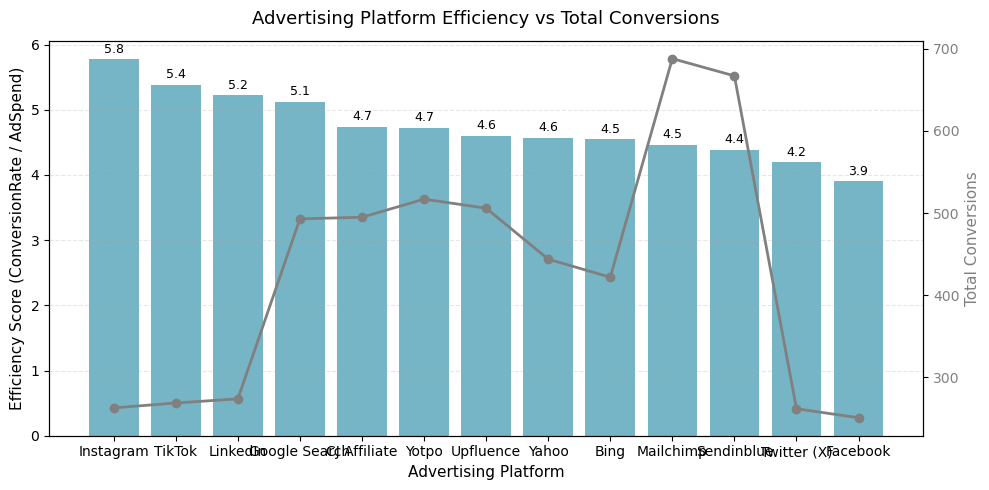

In [16]:
import matplotlib.pyplot as plt

# --- Sort by EfficiencyScore (descending) ---
advertising_sum = advertising_sum.sort_values('EfficiencyScore', ascending=False).reset_index(drop=True)

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(10, 5))

# --- Bar chart: EfficiencyScore ---
bars = ax1.bar(
    advertising_sum['AdvertisingPlatform'],
    advertising_sum['EfficiencyScore'],
    color='#76B5C5'
)

ax1.set_ylabel('Efficiency Score (ConversionRate / AdSpend)', fontsize=11)
ax1.set_xlabel('Advertising Platform', fontsize=11)
ax1.set_title('Advertising Platform Efficiency vs Total Conversions', fontsize=13, pad=12)
ax1.grid(axis='y', linestyle='--', alpha=0.3)

# --- Secondary axis: Total Conversions (grey line) ---
ax2 = ax1.twinx()
ax2.plot(
    advertising_sum['AdvertisingPlatform'],
    advertising_sum['Conversion'],
    color='grey', marker='o', linewidth=2, label='Total Conversions'
)
ax2.set_ylabel('Total Conversions', color='grey', fontsize=11)
ax2.tick_params(axis='y', labelcolor='grey')

# --- Label EfficiencyScore on top of bars ---
for i, v in enumerate(advertising_sum['EfficiencyScore']):
    ax1.text(
        i, v + (max(advertising_sum['EfficiencyScore']) * 0.01),
        f'{v:.1f}', ha='center', va='bottom', fontsize=9, color='black'
    )

plt.tight_layout()
plt.show()




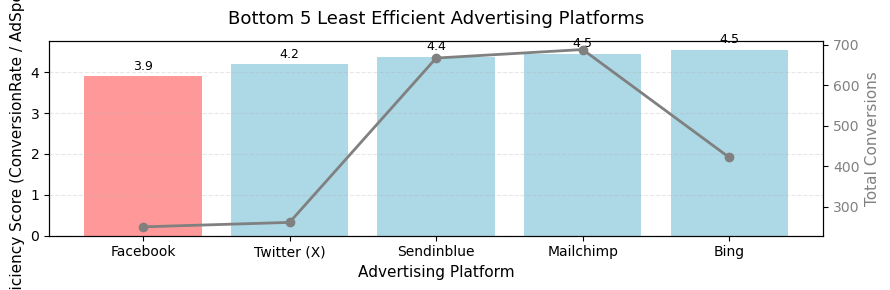

In [17]:
import matplotlib.pyplot as plt

# --- Sort by EfficiencyScore (ascending) ---
advertising_sum_bottom5 = advertising_sum.sort_values('EfficiencyScore', ascending=True).head(5).reset_index(drop=True)

# Identify the least efficient platform
least_idx = advertising_sum_bottom5['EfficiencyScore'].idxmin()

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(9, 3))

# --- Bar chart: EfficiencyScore ---
colors = ['#FF9999' if i == least_idx else '#ADD8E6' for i in range(len(advertising_sum_bottom5))]
bars = ax1.bar(advertising_sum_bottom5['AdvertisingPlatform'],
               advertising_sum_bottom5['EfficiencyScore'],
               color=colors)

ax1.set_ylabel('Efficiency Score (ConversionRate / AdSpend)', fontsize=11)
ax1.set_xlabel('Advertising Platform', fontsize=11)
ax1.set_title('Bottom 5 Least Efficient Advertising Platforms', fontsize=13, pad=12)
ax1.grid(axis='y', linestyle='--', alpha=0.3)

# --- Secondary axis: Total Conversions (grey line) ---
ax2 = ax1.twinx()
ax2.plot(advertising_sum_bottom5['AdvertisingPlatform'],
         advertising_sum_bottom5['Conversion'],
         color='grey', marker='o', linewidth=2, label='Total Conversions')
ax2.set_ylabel('Total Conversions', color='grey', fontsize=11)
ax2.tick_params(axis='y', labelcolor='grey')

# --- Optional: label EfficiencyScore on top of bars ---
for i, v in enumerate(advertising_sum_bottom5['EfficiencyScore']):
    ax1.text(i, v + (max(advertising_sum_bottom5['EfficiencyScore']) * 0.02),
             f'{v:.1f}', ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()


**Interpretation of the Least Efficient Platforms (Bottom 5)**

The bottom five platforms require careful budget management and optimization.

1. **Facebook – Worst Offender**  
   Lowest efficiency and conversion volume; highest budget risk. 
   **Action:** Reduce spend or pause campaigns to reallocate to more productive channels.

3. **Mailchimp & Sendinblue – Volume Drivers**  
   - Conversions: 688 (Mailchimp), 667 (Sendinblue); EfficiencyScores: 4.46–4.38  
   - Deliver high volume but moderate efficiency. 
   **Action:** Maintain spend to meet volume targets, but investigate ways to improve cost-effectiveness.

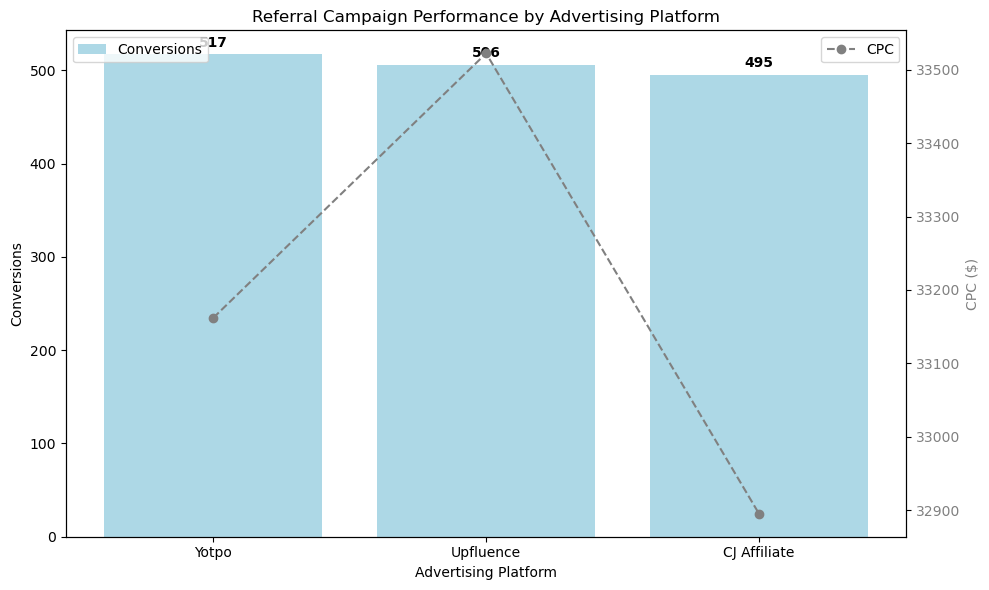

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter only Referral campaigns
referral_campaigns = df[df['CampaignChannel'] == 'Referral'].copy()

# Step 2: Aggregate per AdvertisingPlatform
referral_summary = (
    referral_campaigns.groupby('AdvertisingPlatform')
                      .agg({
                          'Conversion': 'sum',
                          'AdSpend': 'sum',
                          'ClickThroughRate': 'sum'  # Assuming CTR can be used to approximate clicks
                      })
                      .reset_index()
)

# Step 3: Calculate CPC = AdSpend / Clicks
referral_summary['CPC'] = referral_summary['AdSpend'] / referral_summary['ClickThroughRate']

# Step 3b: Sort by # of Conversions descending
referral_summary = referral_summary.sort_values('Conversion', ascending=False).reset_index(drop=True)

# Step 4: Plot bar + line chart
fig, ax1 = plt.subplots(figsize=(10,6))

# --- Bar chart for # of conversions ---
bars = ax1.bar(
    referral_summary['AdvertisingPlatform'],
    referral_summary['Conversion'],
    color='lightblue',
    label='Conversions'
)

# Label each bar with conversion count
for bar in bars:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width()/2,
        height + 5,                           # small offset above bar
        f'{int(height)}',
        ha='center', va='bottom', fontsize=10, color='black', fontweight='bold'
    )

ax1.set_xlabel('Advertising Platform')
ax1.set_ylabel('Conversions', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# --- Secondary y-axis for CPC ---
ax2 = ax1.twinx()
ax2.plot(
    referral_summary['AdvertisingPlatform'],
    referral_summary['CPC'],
    color='grey', marker='o', linestyle='--', label='CPC'
)
ax2.set_ylabel('CPC ($)', color='grey')
ax2.tick_params(axis='y', labelcolor='grey')

# --- Title & legends ---
plt.title('Referral Campaign Performance by Advertising Platform')
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


**Key Finding**

Referral channel delivers consistently high conversions across all platforms.
However, **Upfluence records the highest CPC**, while **CJ Affiliate maintains similar conversion output at the lowest CPC**, making it the most cost-efficient option.

**Implication**

1. Prioritize **CJ Affiliate** for scaling referral campaigns due to better cost-performance.  
2. Continue **Yotpo** for volume stability.  
3. Optimize **Upfluence** spend through creative or rate adjustments to improve efficiency.


**#1 Campaign Channel Analysis**

 **Key Findings**
| Channel / Platform      | Performance Summary                                           
|--------------------------|--------------------------------------------------------------|
| **Instagram (Social Media)** | Highest cost-efficiency and stable conversion performance     |
| **CJ Affiliate (Referral)**  | Highest total conversions; lowest CPC among referral platforms |
| **Facebook**                | Lowest efficiency and conversion volume; highest budget risk   |
| **Mailchimp & Sendinblue**  | Strong volume drivers with moderate efficiency                 |

**Recommendations**
- **Prioritize Instagram** for efficiency-driven campaigns to maximize ROI.  
- **Scale CJ Affiliate** for conversion-focused initiatives leveraging its low CPC.  
- **Maintain Mailchimp and Sendinblue** to sustain conversion volume but optimize cost-efficiency.  
- **Reduce or pause Facebook** campaigns; **reallocate budget** to higher-performing channels.  
- Continue analyzing **campaign types (Conversion vs Awareness)** per platform to refine budget allocation and identify ROI drivers.


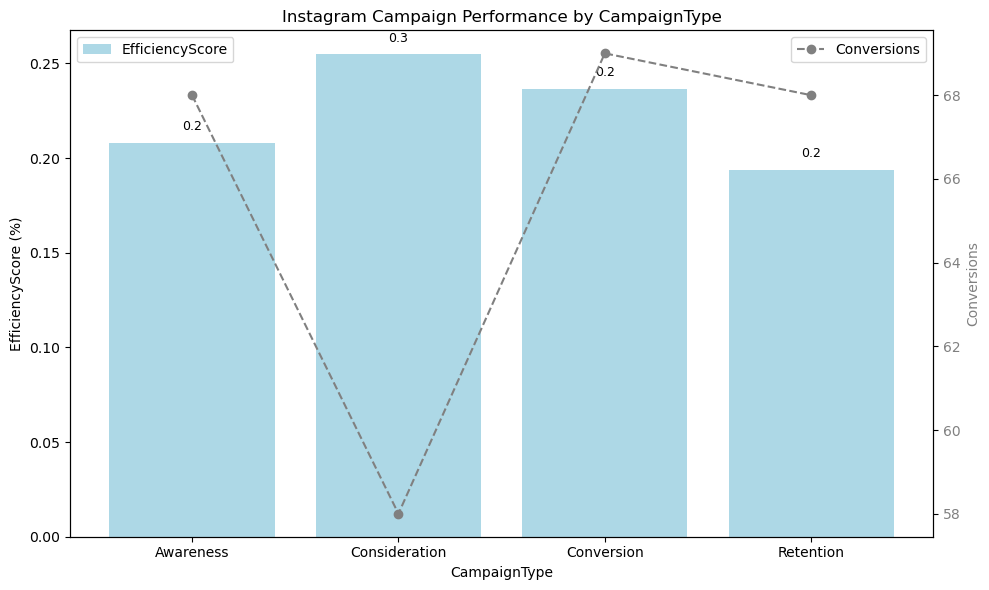

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter only Social Media campaigns
df_socialmedia = df[df['CampaignChannel'] == 'Social Media'].copy()

# Step 2: Filter only Instagram campaigns
instagram_campaigns = df_socialmedia[df_socialmedia['AdvertisingPlatform'] == 'Instagram'].copy()

# Step 3: Aggregate per CampaignType
instagram_summary = (
    instagram_campaigns.groupby('CampaignType')
                       .agg({
                           'ConversionRate': 'mean',
                           'AdSpend': 'mean',
                           'Conversion': 'sum'
                       })
                       .reset_index()
                       .rename(columns={
                           'ConversionRate': 'Avg_ConversionRate',
                           'AdSpend': 'Avg_AdSpend'
                       })
)

# Convert ConversionRate to percentage
instagram_summary['ConversionRate_pct'] = instagram_summary['Avg_ConversionRate'] * 10000

# Calculate EfficiencyScore (percentage per $)
instagram_summary['EfficiencyScore'] = instagram_summary['ConversionRate_pct'] / instagram_summary['Avg_AdSpend']

# Step 4: Plot bar + line chart
fig, ax1 = plt.subplots(figsize=(10,6))

# Bar chart for EfficiencyScore in light blue
bars = ax1.bar(instagram_summary['CampaignType'], instagram_summary['EfficiencyScore'], color='lightblue', label='EfficiencyScore')
ax1.set_xlabel('CampaignType')
ax1.set_ylabel('EfficiencyScore (%)', color='black')  # Axis label in black
ax1.tick_params(axis='y', labelcolor='black')    # Tick labels in black

# --- Optional: label EfficiencyScore on top of bars ---
for i, v in enumerate(instagram_summary['EfficiencyScore']):
    ax1.text(i, v + (max(instagram_summary['EfficiencyScore']) * 0.02),
             f'{v:.1f}', ha='center', va='bottom', fontsize=9, color='black')



# Secondary y-axis for # of conversions (grey line)
ax2 = ax1.twinx()
ax2.plot(instagram_summary['CampaignType'], instagram_summary['Conversion'], color='grey', marker='o', linestyle='--', label='Conversions')
ax2.set_ylabel('Conversions', color='grey')
ax2.tick_params(axis='y', labelcolor='grey')

# Title and legend
plt.title('Instagram Campaign Performance by CampaignType')
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


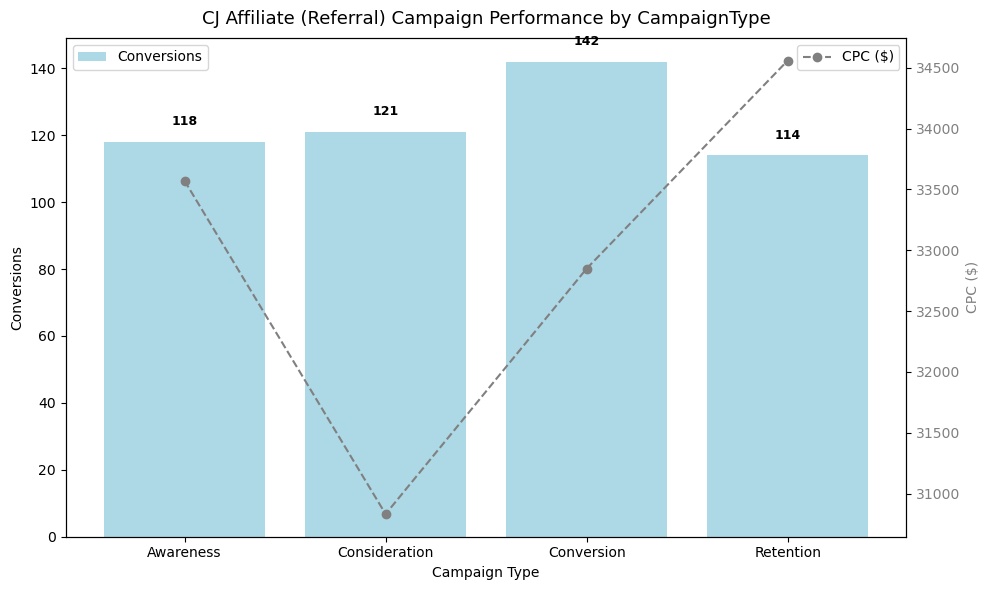

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter only Referral campaigns
df_referral = df[df['CampaignChannel'] == 'Referral'].copy()

# Step 2: Filter only CJ Affiliate platform
cj_campaigns = df_referral[df_referral['AdvertisingPlatform'] == 'CJ Affiliate'].copy()

# Step 3: Aggregate per CampaignType
cj_summary = (
    cj_campaigns.groupby('CampaignType')
                .agg({
                    'Conversion': 'sum',
                    'AdSpend': 'sum',
                    'ClickThroughRate': 'sum'  # used as proxy for clicks
                })
                .reset_index()
)

# Step 4: Calculate CPC = AdSpend / Clicks
cj_summary['CPC'] = cj_summary['AdSpend'] / cj_summary['ClickThroughRate']

# Step 6: Plot bar (Conversions) + line (CPC)
fig, ax1 = plt.subplots(figsize=(10,6))

# --- Bar chart: Conversions ---
bars = ax1.bar(cj_summary['CampaignType'], cj_summary['Conversion'], color='lightblue', label='Conversions')
ax1.set_xlabel('Campaign Type')
ax1.set_ylabel('Conversions', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Label # of conversions above bars
for i, v in enumerate(cj_summary['Conversion']):
    ax1.text(i, v + 5, f"{v:.0f}", ha='center', fontweight='bold', fontsize=9, color='black')

# --- Line chart: CPC ---
ax2 = ax1.twinx()
ax2.plot(cj_summary['CampaignType'], cj_summary['CPC'], color='grey', marker='o', linestyle='--', label='CPC ($)')
ax2.set_ylabel('CPC ($)', color='grey')
ax2.tick_params(axis='y', labelcolor='grey')

# --- Title & Legend ---
plt.title('CJ Affiliate (Referral) Campaign Performance by CampaignType', fontsize=13, pad=10)
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()



**Key Findings:**  
1. Instagram: Conversion campaigns deliver the best balance of **efficiency (0.24%)** and **conversions (69)** — making them the most ROI-effective strategy.  
2. CJ Affiliate: Conversion campaigns lead with **142 conversions**, confirming CJ Affiliate’s strength as a **conversion-driven platform** despite rising CPC in later stages.  

**Implications:**  
Prioritize **Conversion campaigns** & reinvest selectively in **Consideration campaigns** to nurture prospects efficiently before conversion.


**#1 Conclusion & Strategic Implications**

**Conclusion:**  
1. **Instagram** stands out as the most **cost-efficient Social Media platform**, while **CJ Affiliate** leads the **Referral channel** with the highest conversion volume and lowest CPC.  
2. **Conversion CampaignType** delivers the strongest performance across both platforms — achieving the best balance between conversion outcomes and ad spend efficiency.  
3. **Facebook** shows the weakest ROI due to high spend and low conversion impact, signaling inefficient budget use.  
4. **Mailchimp** and **Sendinblue** maintain strong conversion volumes but moderate efficiency, performing best when the objective is reach or awareness.  

 **Strategic Implications:**  
- **Prioritize Instagram Conversion campaigns** for ROI-driven objectives such as product launches, flash sales, and lead-generation.  
- **Position CJ Affiliate as a conversion engine** — focus on referral partnerships and commission-based campaigns that maintain low CPC while maximizing conversion output.  
- **Reallocate underperforming budgets** (e.g., from Facebook) toward top-performing campaigns to enhance total ROI.  
- **Replicate proven tactics** (high-performing creatives, targeting, and timing) from Instagram and CJ across other platforms to boost consistency and efficiency.  
- **Continuously monitor EfficiencyScore (ConversionRate ÷ AdSpend)** to dynamically adjust budget allocations.  
- **Experiment within the Conversion campaign type** to expand best practices:  
   - *Example 1:* **New product launch** campaign that achieved high sign-ups at low cost-per-conversion.  
   - *Example 2:* **Flash sale campaign** generating rapid conversions within 48 hours.  
   - *Example 3:* **Lead-generation offer** (e.g., free trial or downloadable resource) that captured high-quality leads efficiently.  


---


**#2 Target Campaign Analysis: Identifying High-Performing Segments by Age, Income, and Loyalty Impact**

**Objective:**  
To identify which **age and income segments** deliver the highest campaign efficiency and evaluate whether **loyalty points** influence conversion performance and customer retention.

**Analysis Approach:**  
- Group campaign data by **AgeGroup** and **IncomeLevel** to determine which segment achieves the **highest ConversionRate** and **best cost-efficiency**.  
- Examine the relationship between **loyalty point participation** and **ConversionRate**, testing if customers engaged with loyalty programs convert at higher rates.  
- Visualize findings to highlight audience behavior patterns and guide **personalized targeting** and **loyalty optimization strategies**.


**#2 Target Campaign Analysis: Identifying High-Performing Segments by Age & Income**

/var/folders/23/qf75gzqs54g76t973jhch6yc0000gn/T/ipykernel_56300/1404811990.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['AgeGroup', 'Gender', 'IncomeGroup'])
/var/folders/23/qf75gzqs54g76t973jhch6yc0000gn/T/ipykernel_56300/1404811990.py:35: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = seg_summary.pivot_table(


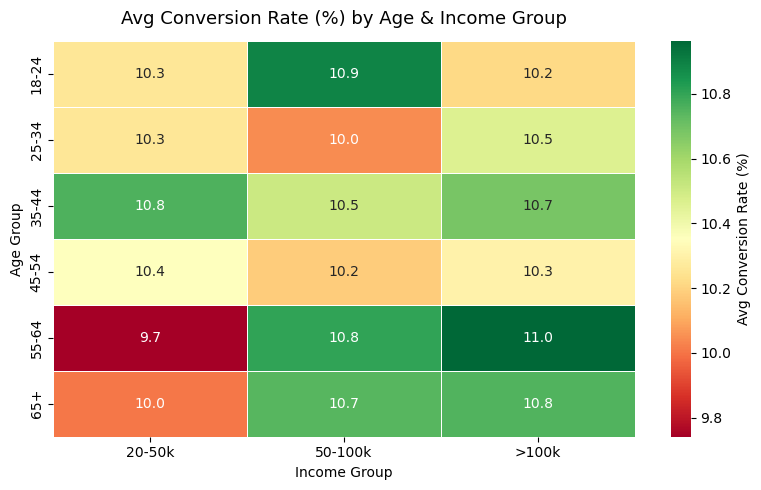

Top 2 Most Responsive Targets:
  - 55-64 | Male | >100k: 11.31%
  - 18-24 | Male | 50-100k: 11.28%

Bottom 2 Less Responsive Targets:
  - 55-64 | Female | 20-50k: 9.49%
  - 65+ | Female | 20-50k: 9.01%


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Define AgeGroup and IncomeGroup ---
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[18, 24, 34, 44, 54, 64, 100],
    labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
)
df['IncomeGroup'] = pd.cut(
    df['Income'],
    bins=[0, 5000, 10000, 20000, 50000, 100000, 500000],
    labels=['<5k', '5-10k', '10-20k', '20-50k', '50-100k', '>100k']
)

# --- Compute average conversion rate per segment ---
seg_summary = (
    df.groupby(['AgeGroup', 'Gender', 'IncomeGroup'])
      ['ConversionRate']
      .mean()
      .reset_index()
      .rename(columns={'ConversionRate': 'Avg_ConversionRate'})
)

# --- Convert to percentage ---
seg_summary['Avg_ConversionRate'] = seg_summary['Avg_ConversionRate'] * 100

# --- Filter IncomeGroup to start from 20k (since below that is empty) ---
income_order = ['20-50k', '50-100k', '>100k']
seg_summary = seg_summary[seg_summary['IncomeGroup'].isin(income_order)]
seg_summary['IncomeGroup'] = pd.Categorical(seg_summary['IncomeGroup'], categories=income_order, ordered=True)

# --- Pivot for heatmap ---
pivot_table = seg_summary.pivot_table(
    index='AgeGroup',
    columns='IncomeGroup',
    values='Avg_ConversionRate',
    aggfunc='mean'
)

# --- Plot heatmap ---
plt.figure(figsize=(8, 5))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".1f",
    cmap='RdYlGn',
    linewidths=0.5,
    cbar_kws={'label': 'Avg Conversion Rate (%)'}
)
plt.title('Avg Conversion Rate (%) by Age & Income Group', fontsize=13, pad=12)
plt.xlabel('Income Group')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()

# --- Print top and bottom 2 segments ---
sorted_seg = seg_summary.sort_values('Avg_ConversionRate', ascending=False)
top2 = sorted_seg.head(2)
bottom2 = sorted_seg.tail(2)

print("Top 2 Most Responsive Targets:")
for _, row in top2.iterrows():
    print(f"  - {row['AgeGroup']} | {row['Gender']} | {row['IncomeGroup']}: {row['Avg_ConversionRate']:.2f}%")

print("\nBottom 2 Less Responsive Targets:")
for _, row in bottom2.iterrows():
    print(f"  - {row['AgeGroup']} | {row['Gender']} | {row['IncomeGroup']}: {row['Avg_ConversionRate']:.2f}%")


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Group by Channel, Age, Gender, Income ---
channel_seg_summary = (
    df.groupby(['CampaignChannel', 'AgeGroup', 'Gender', 'IncomeGroup'])['ConversionRate']
      .mean()
      .reset_index()
      .rename(columns={'ConversionRate': 'Avg_ConversionRate'})
)

# --- Ambil segmen dengan Avg_ConversionRate tertinggi per channel ---
top_segments_per_channel = (
    channel_seg_summary.loc[channel_seg_summary.groupby('CampaignChannel')['Avg_ConversionRate'].idxmax()]
      .sort_values(by='Avg_ConversionRate', ascending=False)
      .reset_index(drop=True)
)

# --- Ubah ke persen ---
top_segments_per_channel['Avg_ConversionRate'] = top_segments_per_channel['Avg_ConversionRate'] * 100

print(top_segments_per_channel)


  CampaignChannel AgeGroup Gender IncomeGroup  Avg_ConversionRate
0        Referral      65+   Male      20-50k           13.435775
1           Email    55-64   Male       >100k           12.833057
2    Social Media    18-24   Male       >100k           12.662669
3             SEO    55-64   Male     50-100k           12.247361


/var/folders/23/qf75gzqs54g76t973jhch6yc0000gn/T/ipykernel_56300/2920948816.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['CampaignChannel', 'AgeGroup', 'Gender', 'IncomeGroup'])['ConversionRate']


**#2 Target Campaign Analysis: Identifying High-Performing Segments by Loyalty Points**

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Define high-loyalty threshold (top 25%)
threshold = df['LoyaltyPoints'].quantile(0.75)
df['HighLP'] = np.where(df['LoyaltyPoints'] >= threshold, 1, 0)

# Split data into two groups
high_group = df[df['HighLP'] == 1]['Conversion']
low_group = df[df['HighLP'] == 0]['Conversion']

# Perform independent T-test
t_stat, p_val = ttest_ind(high_group, low_group, equal_var=False)

# Calculate group means
mean_high, mean_low = high_group.mean(), low_group.mean()

print(f"T-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")
print(f"Mean High LP: {mean_high:.4f}, Mean Low LP: {mean_low:.4f}")

if p_val < 0.05:
    print("Significant difference: High LoyaltyPoints customers show different Conversion Rates.")
else:
    print("No significant difference in Conversion Rate between groups.")


T-statistic: 4.0057, p-value: 0.0001
Mean High LP: 0.9018, Mean Low LP: 0.8659
Significant difference: High LoyaltyPoints customers show different Conversion Rates.


**Key Findings & Strategic Implications**

1.  Mature high-income males and young mid-income males is the **most responsive segment with **① 55–64 Male >100k ( AVG CR: 11.31%) and ② 18–24 Male 50–100k (AVG CR: 11.28%)**
   **Implications:**  
   - Prioritize these two clusters for high-impact targeting.  
   - Tailor creatives by life stage: aspirational, achievement-oriented messaging for younger males; value-driven and legacy-focused for mature males.  

2. **Older low-income female are the least responsive segment with ① 55–64 Female 20–50k (9.49%) and ② 65+ Female 20–50k (9.01%)** .  
   **Implications:**  
   - Optimize creative relevance through affordability, community appeal, or emotional reassurance.  
   - Reallocate media spend away from this cohort or test low-cost awareness formats before scaling.  

3. **Instagram emerges as both the most efficient and most converting channel**,  
   confirming strong content–audience alignment and conversion quality.  
   **Implications:**  
   - Scale media investment in Instagram-led campaigns.  
   - Use Referral and Email channels as support for remarketing or retention touchpoints.  

4. **Conversion performance across channels remains closely clustered**  
   (Referral: 13.44%, Email: 12.83%, Social Media: 12.66%, SEO: 12.25%),  
   implying **executional quality drives differentiation more than channel selection itself**.  

5. **Loyalty Points significantly influence conversion outcomes**  
   **Implications:**  
   - Integrate Loyalty Points mechanics into campaign storytelling and incentive design.  
   - Use LP tiers to segment and retarget high-value customers, enhancing long-term retention.  

**Instagram Target Summary**
| Segment | Age | Gender | Income | Rationale |
|----------|-----|---------|---------|------------|
| Core 1 | 18–24 | Male | 50–100k | High responsiveness, platform-native behavior |
| Core 2 | 55–64 | Male | >100k | Strong conversion intent, financially capable |
| Secondary | 25–34 | Female | >100k | Potential upscale audience for growth |

---


**#3 Timing Campaign Analysis: Identifying When Campaigns Are Most Effective**

**Objective:**  
1. To determine **the most effective time periods** for running campaigns by analyzing conversion trends across different **hours** and **days**.  
2. The goal is to uncover when audiences are most responsive and ensure that **ad spend is concentrated during high-impact periods**.

**Analysis Approach:**  
- Group campaign data by **month** and **Day of Week**  to identify performance patterns.  
- Calculate average **Conversion Rate** for each time segment.  
- Visualize **peak engagement windows** to guide campaign scheduling and budget allocation.


**#3 Timing Campaign Analysis: Best Month of Campaign Launch**

      Month  Avg_ConversionRate
0   2024-06            0.101256
1   2024-07            0.105143
2   2024-08            0.107345
3   2024-09            0.104492
4   2024-10            0.102389
5   2024-11            0.107278
6   2024-12            0.104790
7   2025-01            0.104615
8   2025-02            0.105136
9   2025-03            0.104980
10  2025-04            0.103057
11  2025-05            0.104183
12  2025-06            0.103048


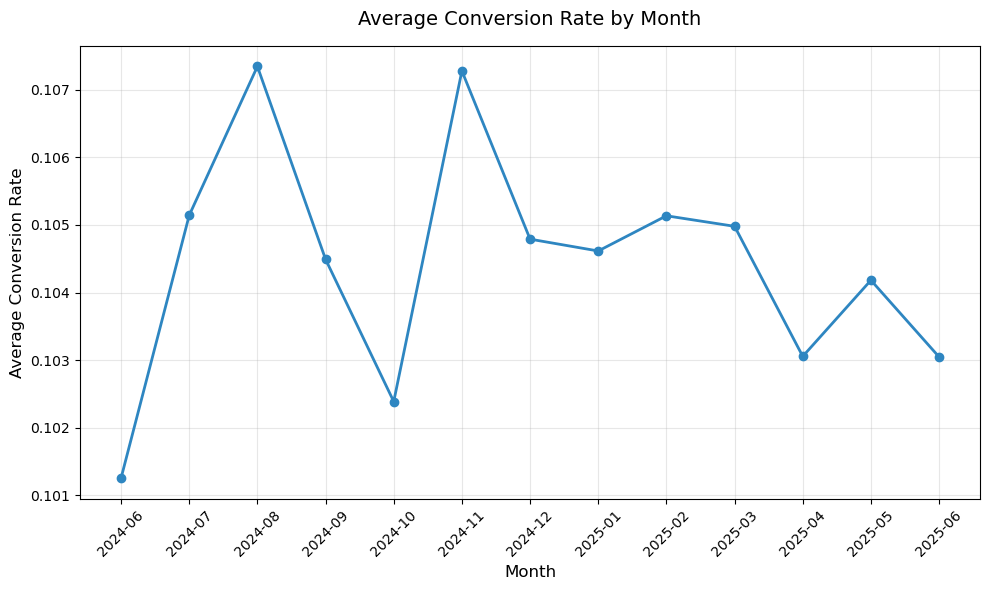

In [ ]:
# --- Ensure ClickTimestamp is in datetime format ---
df['ClickTimestamp'] = pd.to_datetime(df['ClickTimestamp'])

# --- Extract Month (format: YYYY-MM) ---
df['Month'] = df['ClickTimestamp'].dt.to_period('M')

# --- Calculate average Conversion Rate per month ---
avg_conversion_per_month = (
    df.groupby('Month')['ConversionRate']
      .mean()
      .reset_index()
      .rename(columns={'ConversionRate': 'Avg_ConversionRate'})
)

# --- Display result ---
print(avg_conversion_per_month)

# --- Visualization: Monthly Conversion Trend ---
import matplotlib.pyplot as plt

# Convert Period to string for plotting
avg_conversion_per_month['MonthStr'] = avg_conversion_per_month['Month'].astype(str)

plt.figure(figsize=(10, 6))
plt.plot(
    avg_conversion_per_month['MonthStr'],
    avg_conversion_per_month['Avg_ConversionRate'],
    marker='o',
    linewidth=2,
    color='#2E86C1'
)
plt.title('Average Conversion Rate by Month', fontsize=14, pad=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Conversion Rate', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


**#4 Timing Campaign Analysis: Best Day of Campaign Launch**

/var/folders/23/qf75gzqs54g76t973jhch6yc0000gn/T/ipykernel_56300/3399482491.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/23/qf75gzqs54g76t973jhch6yc0000gn/T/ipykernel_56300/3399482491.py:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(avg_by_day['DayOfWeek'], rotation=30)


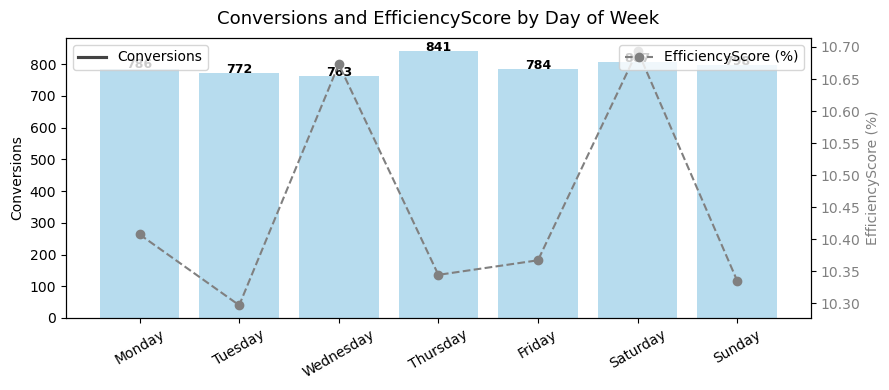

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Ensure ClickTimestamp is datetime ---
df['ClickTimestamp'] = pd.to_datetime(df['ClickTimestamp'])

# --- Extract Day of Week ---
df['DayOfWeek'] = df['ClickTimestamp'].dt.day_name()

# --- Aggregate: total Conversion & avg ConversionRate per Day ---
avg_by_day = (
    df.groupby('DayOfWeek')
      .agg({
          'Conversion': 'sum',
          'ConversionRate': 'mean'
      })
      .reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
      .reset_index()
)

# --- Compute EfficiencyScore (as %) ---
avg_by_day['EfficiencyScore'] = avg_by_day['ConversionRate'] * 100

# --- Identify top days ---
top_conversion_day = avg_by_day.loc[avg_by_day['Conversion'].idxmax(), 'DayOfWeek']
top_efficiency_day = avg_by_day.loc[avg_by_day['EfficiencyScore'].idxmax(), 'DayOfWeek']

# --- Define colors: highlight top conversion & efficiency days ---
base_color = '#AEDFF7'   # baby blue
day_colors = [
    base_color for d in avg_by_day['DayOfWeek']
]

# --- Plot setup ---
fig, ax1 = plt.subplots(figsize=(9, 4))

# Bar chart for total conversions
sns.barplot(
    data=avg_by_day,
    x='DayOfWeek',
    y='Conversion',
    palette=day_colors,
    ax=ax1
)

# Left y-axis (Conversions)
ax1.set_ylabel('Conversions', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Annotate bars
for i, v in enumerate(avg_by_day['Conversion']):
    ax1.text(i, v + 1, f"{v}", ha='center', fontweight='bold', fontsize=9)

# Secondary axis for EfficiencyScore (%)
ax2 = ax1.twinx()
ax2.plot(
    avg_by_day['DayOfWeek'],
    avg_by_day['EfficiencyScore'],
    color='gray',
    marker='o',
    linestyle='--',
    label='EfficiencyScore (%)'
)
ax2.set_ylabel('EfficiencyScore (%)', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Titles and formatting
plt.title('Conversions and EfficiencyScore by Day of Week', fontsize=13, pad=10)
ax1.set_xlabel('')
ax1.set_xticklabels(avg_by_day['DayOfWeek'], rotation=30)

# Legends
ax1.legend(['Conversions'], loc='upper left')
ax2.legend(['EfficiencyScore (%)'], loc='upper right')

plt.tight_layout()
plt.show()


 **#3 Timing Campaign Analysis: Monthly & Weekly Effectiveness**

**Interpretation:**  
1. **August and November** are the peak converting months, reflecting strong user engagement likely driven by seasonal momentum and holiday-related campaigns.  
2. **Wednesday and Saturday** stand out as the top-performing days, delivering the highest **Efficiency Score** and conversion rates.  

**Strategic Implications:**  
- **Maximize campaign intensity in August and November**, aligning with natural traffic peaks — e.g., Independence Day (August) and pre-holiday or year-end shopping trends (November).  
- **Prioritize major campaign pushes on Wednesday and Saturday**, especially for product launches, flash sales, and conversion-driven content.  
- **Allocate higher ad budgets during August–November periods** and on high-performing days to capture top responsiveness and conversion opportunities.  
- **Use other days** for lighter awareness campaigns or audience nurturing efforts.  
- **A/B test timing on Wednesday and Saturday** (morning vs. evening) to refine targeting and sustain peak engagement throughout the campaign calendar.


**Strategic Recommendations for Campaign Efficiency**

| **Focus Area** | **Key Recommendations** |
|----------------|--------------------------|
| **Channels & Campaign Types** | - Prioritize **Social Media (Conversion)** and **Referral (Conversion/Awareness)** for highest ROI. <br> - Scale **Conversion-type campaigns** proven most efficient across both channels. <br> - Reduce spend on **low-performing campaigns** (e.g., Facebook, Social Media Retention) and reallocate to high-return ones. |
| **Platforms** | - Focus on **Instagram** for cost-efficient growth and **CJ Affiliate** as the main conversion driver. <br> - Maintain **Mailchimp** and **Sendinblue** for volume support with cost monitoring. <br> - Continuously track **EfficiencyScore (ConversionRate ÷ AdSpend)** to guide budget shifts. |
| **Target Audience** | - Prioritize **18–24 Male (50–100k)** and **55–64 Male (>100k)** segments for highest responsiveness. <br> - Reduce focus on **older low-income females**; test low-cost awareness approaches instead. |
| **Timing** | - Maximize campaigns during **August & November** for seasonal momentum. <br> - Prioritize **Wednesday & Saturday** for launches and performance pushes. <br> - Use off-peak days for awareness or light engagement campaigns. |
| **Efficiency Focus** | - Optimize based on **cost-per-conversion efficiency**, not total conversions. <br> - Reinvest budget into high-performing channels and campaign types. <br> - Regularly evaluate ROI trends to sustain performance. |
| **Goal** | Maximize **conversion ROI** by focusing on efficient channels (Instagram & CJ Affiliate), responsive audiences, and optimal timing, while refining underperforming campaigns through targeted optimization. |
